In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

from prophet import Prophet


In [9]:
df=pd.read_csv(r'C:\Users\sanga\Downloads\Air-Quality-predictor-of-kathmandu-main\data\processed\processed_data.csv')

In [11]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

MAE: 9.085022182786158
MSE: 165.5372212954747
r2_score: 0.8794696627006696


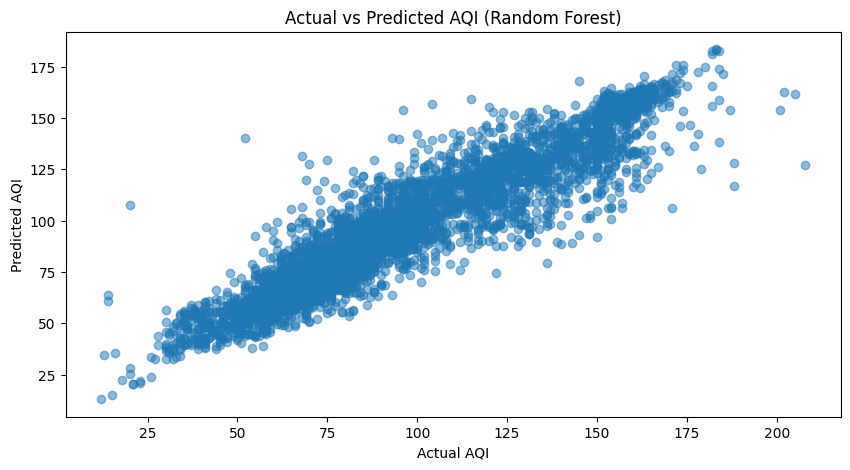

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Selecting features and target
features = df.drop(columns=["AQI", "Datetime"])  # Drop Datetime column
target = df["AQI"]
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Random Forest)")
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Ensure catboost is install
from catboost import CatBoostRegressor

# List of models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(verbose=0)
]

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} - \n MAE: {mean_absolute_error(y_test, y_pred)},\n MSE: {mean_squared_error(y_test, y_pred)},\n r2_score: {r2_score(y_test, y_pred)}")



RandomForestRegressor - 
 MAE: 9.07393522626442,
 MSE: 164.3170350488021,
 r2_score: 0.8803581001090574
GradientBoostingRegressor - 
 MAE: 11.878412882591414,
 MSE: 252.8618508144415,
 r2_score: 0.8158871827720431
AdaBoostRegressor - 
 MAE: 19.592854317396828,
 MSE: 536.7544556700349,
 r2_score: 0.6091803699341404
BaggingRegressor - 
 MAE: 9.472094055013311,
 MSE: 180.0301818988465,
 r2_score: 0.8689171028816771
ExtraTreesRegressor - 
 MAE: 8.66242679680568,
 MSE: 150.37033917480036,
 r2_score: 0.8905129157133626
XGBRegressor - 
 MAE: 9.49376392364502,
 MSE: 169.4493408203125,
 r2_score: 0.8766211867332458
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2005
[LightGBM] [Info] Number of data points in the train set: 18028, number of used features: 9
[LightGBM] [Info] 

In [16]:
import pickle 
import os

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(rf, file)
    # Ensure the models folder exists
    os.makedirs("models", exist_ok=True)

    # Save the model into the models folder
    with open("models/model.pkl", "wb") as file:
        pickle.dump(rf, file)

